<a href="https://colab.research.google.com/github/Jorge201213124/TFM_UNIR/blob/main/Modelos/Deep_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Primero se importan las librerias
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from google.colab import files
import io
import math

In [ ]:
# Se muestra la version de tensorflow
print(tf.__version__)

2.6.0


In [ ]:
# Se cargan los conjuntos de datos
trainUploaded = files.upload()
testUploaded = files.upload()

Saving trainData.csv to trainData.csv


Saving testData.csv to testData.csv


In [ ]:
# Se cargan los datos de prueba
testData = pd.read_csv(io.BytesIO(testUploaded['testData.csv']))
testData.head()

,Caudal,pH,Temperatura,Conductividad,Salinidad,Solidos.Totales,O2,O2p,DBO5,DQO,FT,NT,Turbidez,Coliformes
0,0.039124,0.479532,0.444444,0.687295,0.666667,0.438732,0.007392,0.001774,0.199333,0.080684,0.112487,0.297434,0.004854,0.741096
1,0.041275,0.432749,0.409091,0.741597,0.666667,0.467541,0.017951,0.003710,0.266055,0.100976,0.098225,0.283014,0.002610,0.722712
2,0.014153,0.456140,0.191919,0.460725,0.333333,0.319525,0.035903,0.009516,0.165972,0.066383,0.112123,0.205691,0.004854,0.824133
3,0.000444,0.502924,0.560606,0.470087,0.500000,0.323499,0.098205,0.021935,0.082569,0.042420,0.048617,0.107840,0.007781,0.695706
4,0.001284,0.777778,0.479798,0.027806,0.083333,0.089058,0.685322,0.143226,0.001668,0.001449,0.000374,0.003424,0.000000,0.319181


In [ ]:
# Se cargan los datos de prueba
trainData = pd.read_csv(io.BytesIO(trainUploaded['trainData.csv']))
trainData.head()

,Caudal,pH,Temperatura,Conductividad,Salinidad,Solidos.Totales,O2,O2p,DBO5,DQO,FT,NT,Turbidez,Coliformes
0,0.250869,0.666667,0.641414,0.548731,0.500000,0.365221,0.028511,0.003871,0.078399,0.031017,0.031254,0.126900,0.004195,0.823149
1,0.084240,0.210526,0.540404,0.630184,0.500000,0.408931,0.024287,0.005161,0.374479,0.165716,0.122449,0.226107,0.016074,0.774917
2,0.000511,0.526316,0.722222,0.706020,0.666667,0.448666,0.006336,0.002258,0.128440,0.055561,0.087999,0.185615,0.005586,0.896349
3,0.214183,0.678363,0.560606,0.952252,0.833333,0.579794,0.009504,0.003871,0.190992,0.091700,0.096811,0.209885,0.019732,0.751703
4,0.000459,0.526316,0.904040,0.389570,0.333333,0.337406,0.221753,0.052419,0.115930,0.064837,0.406710,0.019225,0.005390,0.680285


In [ ]:
# Separar la variable dependiente
train_labels = trainData.pop('Coliformes')
test_labels = testData.pop('Coliformes')

In [ ]:
# Se define el modelo
model= keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=[len(trainData.keys())]))
model.add(keras.layers.Dense(64, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(keras.layers.Dense(1))

In [ ]:
# Mostrar el resumen de la configuracion
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilando el modelo
model.compile(loss="mse",
              optimizer= "adam",
              metrics =["mse",'mae',tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredLogarithmicError()])

In [ ]:
# Entrenamiento y Evaluacion del Modelo
history = model.fit(trainData, train_labels, epochs=50, batch_size=64, validation_split = 0.1)

Epoch 1/50
5/5 [==============================] - 1s 58ms/step - loss: 0.6155 - mse: 0.6028 - mae: 0.7421 - root_mean_squared_error: 0.7764 - mean_squared_logarithmic_error: 0.2944 - val_loss: 0.4442 - val_mse: 0.4317 - val_mae: 0.6260 - val_root_mean_squared_error: 0.6570 - val_mean_squared_logarithmic_error: 0.2070
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.3702 - mse: 0.3578 - mae: 0.5619 - root_mean_squared_error: 0.5982 - mean_squared_logarithmic_error: 0.1649 - val_loss: 0.2381 - val_mse: 0.2259 - val_mae: 0.4469 - val_root_mean_squared_error: 0.4753 - val_mean_squared_logarithmic_error: 0.0936
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.1946 - mse: 0.1825 - mae: 0.3988 - root_mean_squared_error: 0.4272 - mean_squared_logarithmic_error: 0.0740 - val_loss: 0.0891 - val_mse: 0.0772 - val_mae: 0.2644 - val_root_mean_squared_error: 0.2779 - val_mean_squared_logarithmic_error: 0.0288
Epoch 4/50
5/5 [=============================

In [ ]:
loss, mae, mse, rmse, rmlse = model.evaluate(testData, test_labels, verbose=2)
model.evaluate(testData, test_labels, verbose=2)
print(mse)
print(rmse)
print(math.sqrt(rmlse))
print(mae)

2/2 - 0s - loss: 0.0309 - mse: 0.0245 - mae: 0.1090 - root_mean_squared_error: 0.1566 - mean_squared_logarithmic_error: 0.0100
2/2 - 0s - loss: 0.0309 - mse: 0.0245 - mae: 0.1090 - root_mean_squared_error: 0.1566 - mean_squared_logarithmic_error: 0.0100
0.10904776304960251
0.156561017036438
0.0999522012975296
0.02451135404407978


In [ ]:
# Grafica para mostrar las graficas del entrenamiento.
def showGraphs(history):
  acc = history.history['root_mean_squared_error']
  val_acc = history.history['val_root_mean_squared_error']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  # Graficar Precision
  plt.plot(epochs, acc, 'b', label='RMSE Entrenamiento')
  plt.plot(epochs, val_acc, 'r', label='RMSE Validacion')
  plt.title('RMSE de entrenamiento y validación')
  plt.xlabel('Epocas')
  plt.ylabel('RMSE')
  plt.legend()

  # Graficar Error
  #plt.plot(epochs, loss, 'b', label='Training Loss')
  #plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  #plt.title('Perdida de entrenamiento y validación')
  #plt.legend()

  plt.savefig("abc.png", dpi=100)
  #files.download("abc.png")

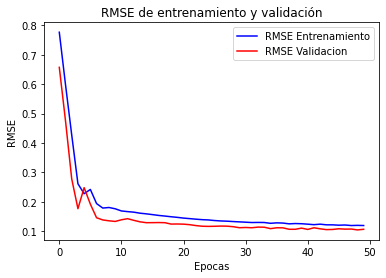

In [ ]:
showGraphs(history)

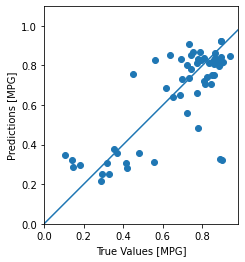

In [ ]:
# Mostrar predicciones
test_predictions = model.predict(testData).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
# Guardar predicciones
df = pd.DataFrame(list(zip(test_labels, test_predictions)), columns=['real','pred'])
df.head()

,real,pred
0,0.741096,0.783417
1,0.722712,0.803421
2,0.824133,0.741066
3,0.695706,0.731993
4,0.319181,0.309518


In [ ]:
# Exportar archivo
df.to_csv('nnProf.csv')
files.download('nnProf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>